# Import of all pictures into a Pandas Dataframe

Import of libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split

## Data preparation
First count the number of pictures. Then put the paths for all pictures with the class and patient_id in a dataframe entry.

In [2]:
base_path = "data"
folder = os.listdir(base_path)
total_images = 0

#finding the number of total images
for n in range(len(folder)):
    if folder[n] == 'IDC_regular_ps50_idx5':
        continue
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = os.path.join(base_path, patient_id )
        class_path = os.path.join(patient_path, str(c))
        subfiles = os.listdir(class_path)
        total_images += len(subfiles)

#DATAFRAME
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "class"])
k = 0
for n in range(len(folder)):
    if folder[n] == 'IDC_regular_ps50_idx5':
        continue
    patient_id = folder[n]
    patient_path = os.path.join(base_path, patient_id )
    for c in [0,1]:
        class_path = os.path.join(patient_path, str(c))
        subfiles = os.listdir(class_path)
        for m in range(len(subfiles)):
            image_path = subfiles[m]
            data.iloc[k]["path"] = os.path.join(class_path, image_path)
            data.iloc[k]["class"] = c
            data.iloc[k]["patient_id"] = patient_id
            k += 1  

data/12910/0/12910_idx5_x501_y701_class0.png
patient_id                                           12910
path          data/12910/0/12910_idx5_x501_y701_class0.png
class                                                    0
Name: 124, dtype: object


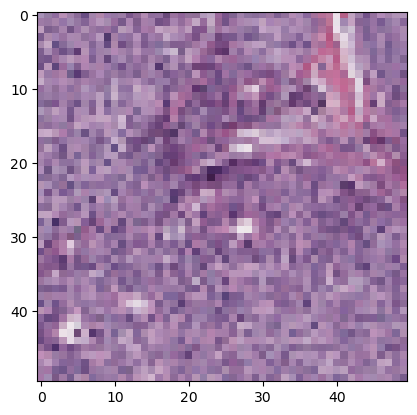

In [3]:
print(data.loc[124,'path'])
print(data.loc[124])
plt.imshow(plt.imread(data.loc[124,'path']))

In [4]:
#Creating a dataframe for each patient
for i in folder:
    if folder[n] == 'IDC_regular_ps50_idx5':
        continue
    df = data[data['patient_id'] == i]
    exec(f'data{i} = df')

In [5]:
#using train_test_split for splitting the data
train_data, test_data = train_test_split(data, test_size=0.3, random_state=30)
print('########## Train data ##########')
print(train_data)
print('########## Test data ##########')
print(test_data)

########## Train data ##########
       patient_id                                            path class
50095       16554   data/16554/1/16554_idx5_x1401_y851_class1.png     1
30690       13613   data/13613/0/13613_idx5_x1451_y301_class0.png     0
241690      10299  data/10299/1/10299_idx5_x1301_y2151_class1.png     1
25485       16014   data/16014/0/16014_idx5_x1351_y401_class0.png     0
151234      10279   data/10279/0/10279_idx5_x1351_y751_class0.png     0
...           ...                                             ...   ...
3905        12242   data/12242/1/12242_idx5_x1401_y351_class1.png     1
108969      13458   data/13458/0/13458_idx5_x1851_y101_class0.png     0
222339       9257    data/9257/0/9257_idx5_x1151_y1201_class0.png     0
46220       13404  data/13404/1/13404_idx5_x1901_y1851_class1.png     1
48045       10282   data/10282/0/10282_idx5_x1251_y651_class0.png     0

[194267 rows x 3 columns]
########## Test data ##########
       patient_id                           

In [6]:
print(data.patient_id)

0         12910
1         12910
2         12910
3         12910
4         12910
          ...  
277520    13666
277521    13666
277522    13666
277523    13666
277524    13666
Name: patient_id, Length: 277525, dtype: object


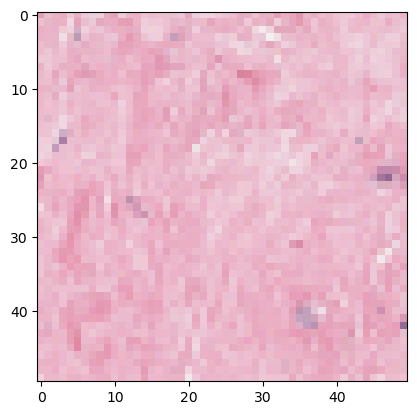

In [8]:
for i in range(10):
    plt.imshow(plt.imread(data.loc[i,'path']))
plt.show()